# TRAFFIC SIGN CLASSIFICATION

Traffic sign classification is important for self driving cars. In this dataset there are 43 different classes. In this project, we will train Deep Convolution Neural Network (CNN)to classify Traffic Signals .Images are of 32*32 pixels and Coloured Image consist of 3 RGB Channels for Red,Green,Blue

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import random
import tensorflow as tf
import seaborn as sns

#### Data is divided to 60%,20%,20% segment for training,validation,and testing.
- `TRAINING SET:` USED FOR GRADIENT CALCULATION AND WEIGHT UPDATE
- `VALIDATION SET:`USED FOR CROSS-VALIDATION TO OVERCOME FITTING 
- `TESTING SET:` USED FOR TESTING CNN

In [2]:
# mode rb denotes read-binary
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
print("X_train data shape: ",X_train.shape,y_train.shape)

X_train data shape:  (34799, 32, 32, 3) (34799,)


In [5]:
X_test.shape, y_test.shape

((12630, 32, 32, 3), (12630,))

In [6]:
X_validation.shape, y_validation.shape

((4410, 32, 32, 3), (4410,))

## PERFROM IMAGES VISUALIZATION

12

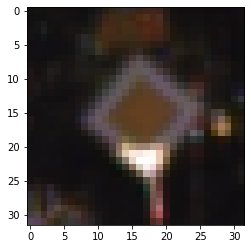

In [7]:
i = np.random.randint(1, len(X_train))
plt.imshow(X_train[i])


y_train[i]

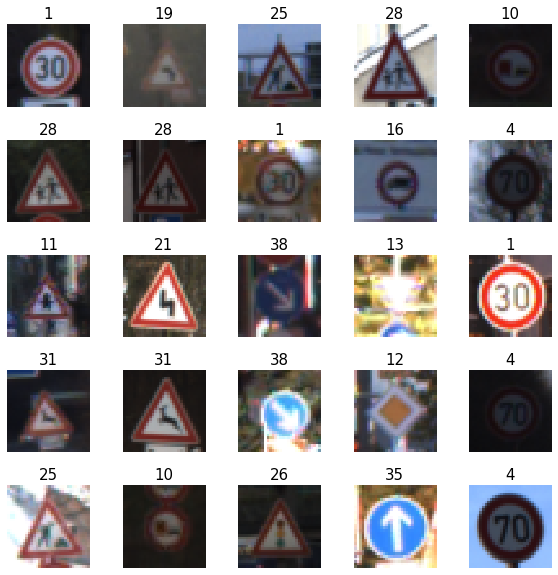

In [8]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
W_grid = 5
L_grid = 5

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(X_train) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index    
    axes[i].imshow( X_train[index])
    axes[i].set_title(y_train[index], fontsize = 15)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

        

# CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [9]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

We are doing shuffle because we don't want that our network to learn the order of the data.

### Convert to grey Scale

In [12]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)

### Normalize 

In [13]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

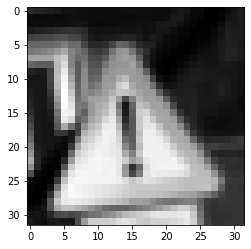

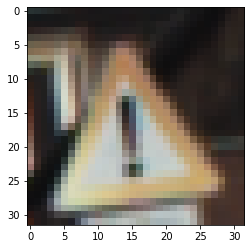

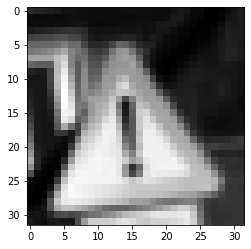

In [14]:
i = random.randint(1, len(X_train_gray))
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

## BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [15]:
from tensorflow.keras import datasets, layers, models

CNN = models.Sequential()

CNN.add(layers.Conv2D(6, (5,5), activation = 'relu', input_shape = (32,32,1)))
CNN.add(layers.AveragePooling2D())

#CNN.add(layers.Dropout(0.2))

CNN.add(layers.Conv2D(16, (5,5), activation = 'relu'))
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120, activation = 'relu'))

CNN.add(layers.Dense(84, activation = 'relu'))

CNN.add(layers.Dense(43, activation = 'softmax'))
CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

## COMPILE AND TRAIN DEEP CNN MODE

In [16]:
CNN.compile(optimizer = 'Adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [17]:
history = CNN.fit(X_train_gray_norm,
                 y_train, 
                 batch_size = 500,
                 nb_epoch = 50,
                 verbose = 1,
                 validation_data = (X_validation_gray_norm, y_validation))

Train on 34799 samples, validate on 4410 samples
Epoch 1/50
34799/34799 [==============================] - 28s 808us/sample - loss: 3.2622 - accuracy: 0.1547 - val_loss: 2.9560 - val_accuracy: 0.2660
Epoch 2/50
34799/34799 [==============================] - 24s 682us/sample - loss: 1.8405 - accuracy: 0.4959 - val_loss: 1.4869 - val_accuracy: 0.5662
Epoch 3/50
34799/34799 [==============================] - 24s 686us/sample - loss: 0.9662 - accuracy: 0.7180 - val_loss: 1.0257 - val_accuracy: 0.7023
Epoch 4/50
34799/34799 [==============================] - 25s 717us/sample - loss: 0.6735 - accuracy: 0.8064 - val_loss: 0.8070 - val_accuracy: 0.7608
Epoch 5/50
34799/34799 [==============================] - 26s 733us/sample - loss: 0.5142 - accuracy: 0.8590 - val_loss: 0.7234 - val_accuracy: 0.7912
Epoch 6/50
34799/34799 [==============================] - 25s 730us/sample - loss: 0.4238 - accuracy: 0.8872 - val_loss: 0.6731 - val_accuracy: 0.8068
Epoch 7/50
34799/34799 [=====================

## ASSESS TRAINED CNN MODEL PERFORMANCE

In [18]:
score = CNN.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

12630/12630 [==============================] - 3s 232us/sample - loss: 1.3025 - accuracy: 0.8672
Test Accuracy: 0.8672208786010742


In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

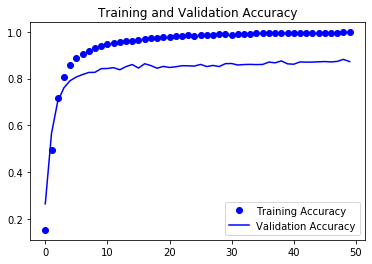

In [21]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

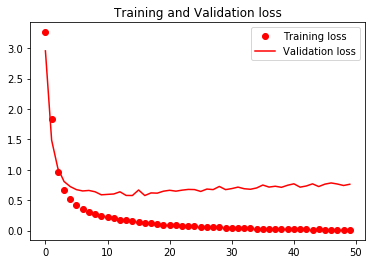

In [22]:
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [26]:
predicted_classes = CNN.predict_classes(X_test_gray_norm)
y_true = y_test

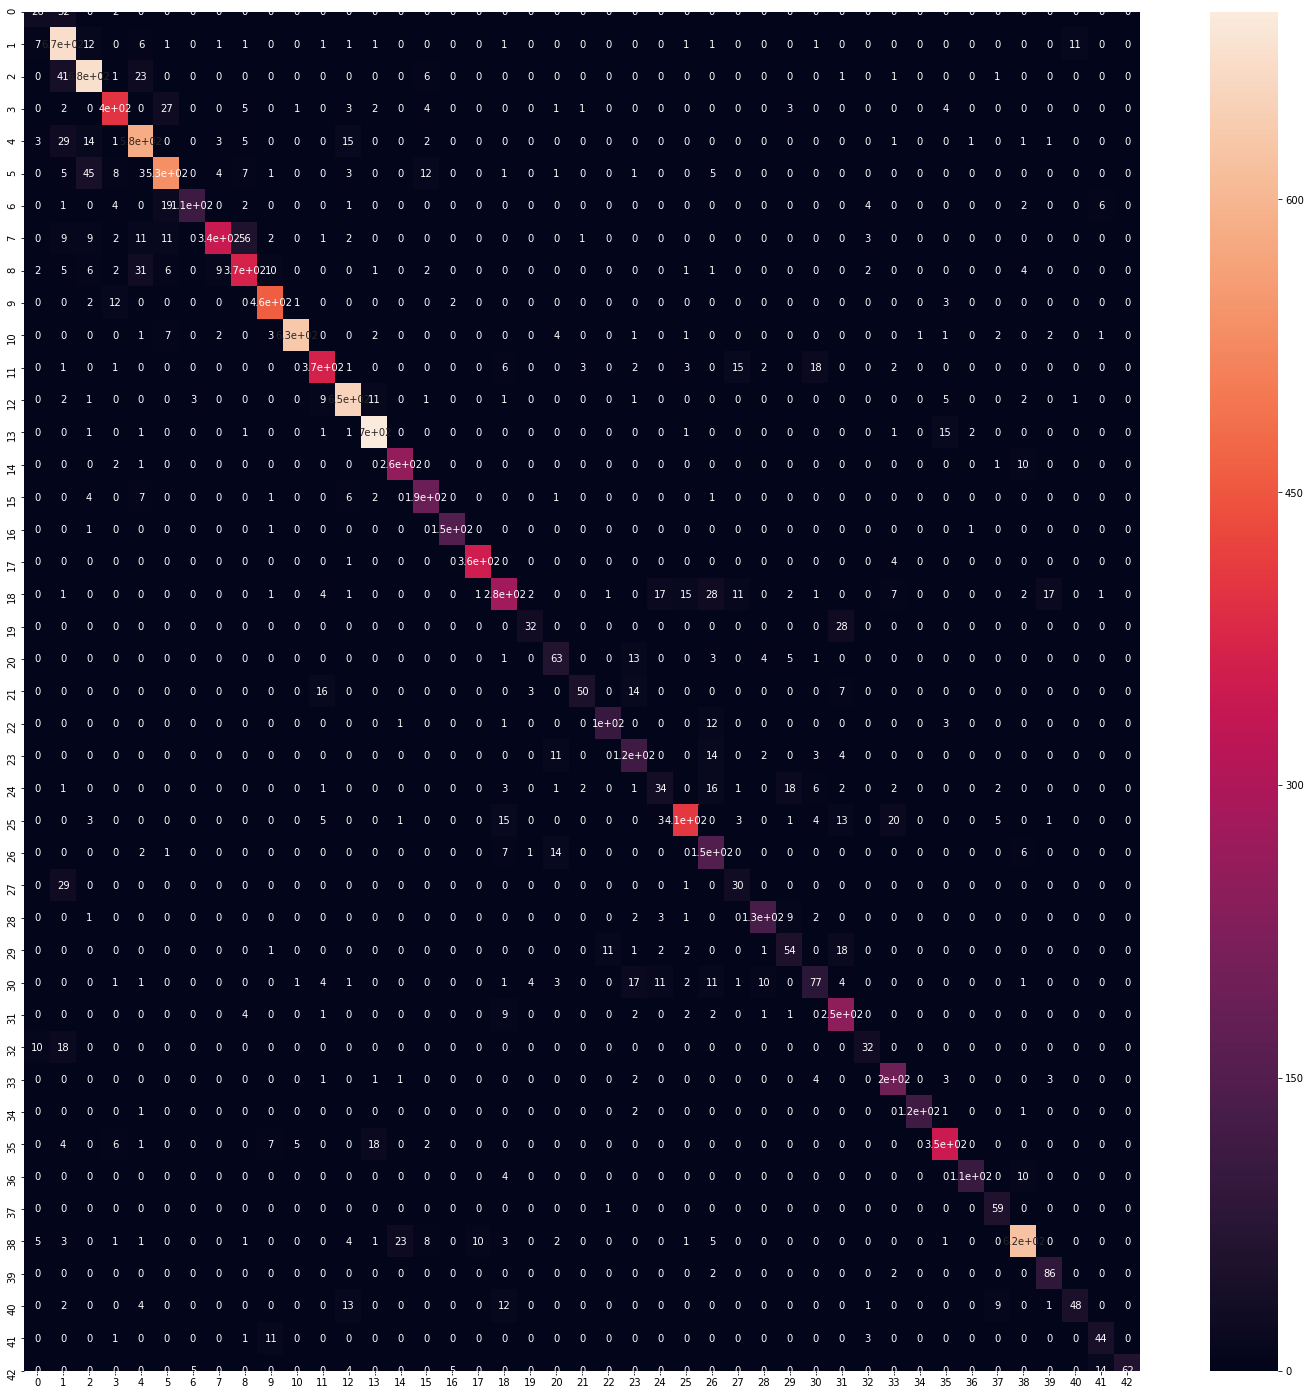

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

The Heatmap diagonal shows that correctly classified images and other then that is predicted falsely

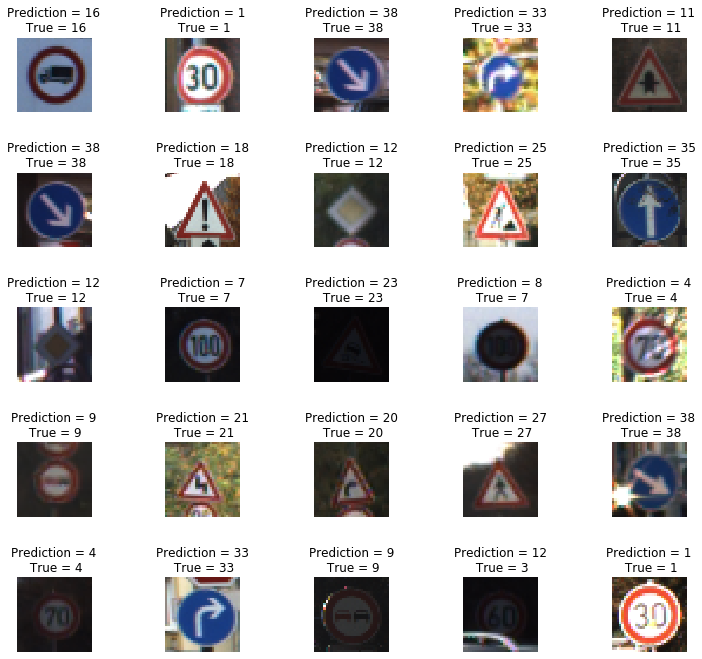

In [25]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1) 

# Thank You